In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
def isNaN(df, colonne):
    if any(pd.isna(df[colonne])):
        print(df[pd.isna(df[colonne])])
    else :
        print("Pas de valeur NaN.")
        print("------------------")
        print(df.head())
        print("\n")

# Construction de l'échantillon

In [3]:
data = pd.read_csv("FAOSTAT_stats_1.csv")
data = data[['Pays', 'Produit', 'Élément', 'Année', 'Valeur']]
data = pd.pivot_table(data, index=['Année', 'Pays', 'Produit'], 
                      columns = ['Élément'],
                     values='Valeur')
data = data.reset_index()

#Unités : 

#Passons la disponibilité alimentaire en kcal/pers/an au lieu de kcal/pers/jour : 
data['Disponibilité alimentaire (Kcal/personne/jour)'] = data['Disponibilité alimentaire (Kcal/personne/jour)']*365
data = data.rename(columns = {'Disponibilité alimentaire (Kcal/personne/jour)':'Dispo_alim (kcal/personne)'})

#Passons la disponinilité de protéines en kg/pers/an au lieu de g/pers/jour : 
data['Disponibilité de protéines en quantité (g/personne/jour)'] = data['Disponibilité de protéines en quantité (g/personne/jour)']*0.365
data = data.rename(columns = {'Disponibilité de protéines en quantité (g/personne/jour)' : 'Dispo_prot (kg/personne)'})

#Changeons le nom de Disponibilité alimentaire en quantité : 
data = data.rename(columns = {'Disponibilité alimentaire en quantité (kg/personne/an)' : 'Dispo_alim (kg/personne)'})

data.head()

Élément,Année,Pays,Produit,Dispo_alim (kcal/personne),Dispo_alim (kg/personne),Dispo_prot (kg/personne),Population totale
0,2012,Afghanistan,Abats Comestible,2190.0,1.82,0.29565,NaN
1,2012,Afghanistan,"Agrumes, Autres",0.0,0.62,0.00365,NaN
2,2012,Afghanistan,Aliments pour enfants,365.0,0.06,0.01095,NaN
3,2012,Afghanistan,Ananas,0.0,0.00,NaN,NaN
4,2012,Afghanistan,Bananes,1095.0,1.60,0.01095,NaN


## Calcul de la disponibilité alimentaire Totale (en kg) / Pays

In [4]:
dispo_alim_tot_kg = data[["Pays", "Année", "Dispo_alim (kg/personne)"]]
dispo_alim_tot_kg = dispo_alim_tot_kg.groupby(["Année", "Pays"]).sum()
dispo_alim_tot_kg = dispo_alim_tot_kg.rename(columns={"Dispo_alim (kg/personne)":"Dispo_alim_tot (kg/personne)"})
dispo_alim_tot_kg = dispo_alim_tot_kg.reset_index()
dispo_alim_tot_kg = dispo_alim_tot_kg[dispo_alim_tot_kg.Année == 2013]
dispo_alim_tot_kg = dispo_alim_tot_kg[["Pays","Dispo_alim_tot (kg/personne)"]]

isNaN(dispo_alim_tot_kg, "Dispo_alim_tot (kg/personne)")

Pas de valeur NaN.
------------------
Élément            Pays  Dispo_alim_tot (kg/personne)
175         Afghanistan                        351.41
176      Afrique du Sud                        564.80
177             Albanie                       1095.54
178             Algérie                        809.13
179           Allemagne                        957.52




## Calcul de la disponibilité alimentaire Totale (en kcal) / Pays

In [5]:
dispo_alim_tot_kcal = data[["Pays", "Année", "Dispo_alim (kcal/personne)"]]
dispo_alim_tot_kcal = dispo_alim_tot_kcal.groupby(["Année", "Pays"]).sum()
dispo_alim_tot_kcal = dispo_alim_tot_kcal.rename(columns={"Dispo_alim (kcal/personne)":"Dispo_alim_tot (kcal/personne)"})
dispo_alim_tot_kcal = dispo_alim_tot_kcal.reset_index()
dispo_alim_tot_kcal = dispo_alim_tot_kcal[dispo_alim_tot_kcal.Année == 2013]
dispo_alim_tot_kcal = dispo_alim_tot_kcal[["Pays", "Dispo_alim_tot (kcal/personne)"]]

isNaN(dispo_alim_tot_kcal, "Dispo_alim_tot (kcal/personne)") 

Pas de valeur NaN.
------------------
Élément            Pays  Dispo_alim_tot (kcal/personne)
175         Afghanistan                        761755.0
176      Afrique du Sud                       1102300.0
177             Albanie                       1163620.0
178             Algérie                       1201945.0
179           Allemagne                       1278595.0




## Calcul du ratio pop n/n-1 

In [6]:
ratio_pop = data[["Année", "Pays", "Produit", "Population totale"]]
ratio_pop = ratio_pop[ratio_pop.Produit == "Population"]
ratio_pop = ratio_pop.groupby(['Pays', 'Année']).sum()

#On remet la colonne à la bonne unité (unité de base : 1 = 1000) : 
ratio_pop['Population totale'] = ratio_pop['Population totale']*1000

#Reset index : 
ratio_pop = ratio_pop.reset_index()

isNaN(ratio_pop, 'Population totale')

Pas de valeur NaN.
------------------
Élément            Pays  Année  Population totale
0           Afghanistan   2012         29825000.0
1           Afghanistan   2013         30552000.0
2        Afrique du Sud   2012         52386000.0
3        Afrique du Sud   2013         52776000.0
4               Albanie   2012          3162000.0




In [7]:
var_pop = ratio_pop[ratio_pop.Année == 2013]
var_pop = var_pop[['Pays', 'Population totale']]
pop_n_1 = ratio_pop[ratio_pop.Année == 2012]
pop_n_1 = pop_n_1[['Pays', 'Population totale']]

var_pop = pd.merge(var_pop, pop_n_1,left_on='Pays', right_on='Pays')
var_pop = var_pop.rename(columns = {"Population totale_x" : "Population totale 2013", "Population totale_y" : "Population totale 2012"})

var_pop['Ratio_pop (%)'] = (var_pop['Population totale 2013']/ var_pop['Population totale 2012'])*100
var_pop = var_pop[["Pays", "Ratio_pop (%)"]]

isNaN(var_pop, "Ratio_pop (%)")

Pas de valeur NaN.
------------------
Élément            Pays  Ratio_pop (%)
0           Afghanistan     102.437552
1        Afrique du Sud     100.744474
2               Albanie     100.347881
3               Algérie     101.886596
4             Allemagne      99.911836




## Calcul de la disponibilité alimentaire en protéines 

In [8]:
dispo_prot = data[["Pays", "Année", "Dispo_prot (kg/personne)"]]
dispo_prot = dispo_prot.groupby(["Année", "Pays"]).sum()
dispo_prot = dispo_prot.reset_index()
dispo_prot = dispo_prot[dispo_prot.Année == 2013]
dispo_prot = dispo_prot[["Pays", "Dispo_prot (kg/personne)"]]

isNaN(dispo_prot,"Dispo_prot (kg/personne)")

Pas de valeur NaN.
------------------
Élément            Pays  Dispo_prot (kg/personne)
175         Afghanistan                  21.26490
176      Afrique du Sud                  31.14545
177             Albanie                  40.65005
178             Algérie                  33.55080
179           Allemagne                  37.00735




## Calcul du ratio protéines d'origine animales / quantité totale de protéines 

In [9]:
#On intègre d'abord le fichier contenant les produits d'origine animale : 
data_ani = pd.read_csv("FAOSTAT_prot_ani.csv")
data_ani = data_ani[['Pays', "Code Produit", 'Produit', 'Élément', 'Année', 'Valeur']]
data_ani = pd.pivot_table(data_ani, index=['Année', 'Pays', 'Produit'], 
                      columns = ['Élément'],
                     values='Valeur')
data_ani = data_ani.reset_index()

#On récupère ainsi les produits d'origine animale. 

#On cherche ensuite si les produits du Df Data correspondent ou non aux produits du df data_ani : 
is_ani = data[data.Année == 2013]
result = []
for i in is_ani['Produit'].iteritems():
    resultat = any(i[1] == data_ani['Produit'])
    result.append(resultat)

#On convertie notre list result en Df et on merge avec le Df is_ani :
result_df = pd.DataFrame(result, index=is_ani.index, columns=["Origine_animale"])
is_ani = pd.merge(is_ani, result_df, left_index=True, right_index=True)
#On ne garde que les colonnes intéressantes : 
is_ani = is_ani[["Année", "Pays", "Produit", "Dispo_prot (kg/personne)", "Origine_animale"]]
is_ani.head()

,Année,Pays,Produit,Dispo_prot (kg/personne),Origine_animale
14528,2013,Afghanistan,Abats Comestible,0.28105,True
14529,2013,Afghanistan,"Agrumes, Autres",0.00730,False
14530,2013,Afghanistan,Aliments pour enfants,0.01095,False
14531,2013,Afghanistan,Ananas,NaN,False
14532,2013,Afghanistan,Bananes,0.01825,False


In [10]:
is_ani_yes = is_ani[is_ani.Origine_animale == True]
is_ani_all = is_ani

is_ani_yes = is_ani_yes[["Année", "Pays", "Dispo_prot (kg/personne)"]]
is_ani_yes = is_ani_yes.groupby(["Année", "Pays"]).sum()
is_ani_yes = is_ani_yes.reset_index()

is_ani_all = is_ani_all[["Année", "Pays", "Dispo_prot (kg/personne)"]]
is_ani_all = is_ani_all.groupby(["Année", "Pays"]).sum()
is_ani_all = is_ani_all.reset_index()

ratio_prot = is_ani_yes[["Année", "Pays"]]
ratio_prot['Ratio_prot (kg/personne)'] = (is_ani_yes["Dispo_prot (kg/personne)"] / is_ani_all["Dispo_prot (kg/personne)"])*100

isNaN(ratio_prot,"Ratio_prot (kg/personne)")

Pas de valeur NaN.
------------------
   Année            Pays  Ratio_prot (kg/personne)
0   2013     Afghanistan                 20.957775
1   2013  Afrique du Sud                 42.646197
2   2013         Albanie                 53.344707
3   2013         Algérie                 27.175805
4   2013       Allemagne                 60.647007




## Ajout de l'Import / Export de poulet 

In [11]:
#Chargement du fichier : 
data_poulet = pd.read_csv("FAOSTAT_poulet_import_export.csv")
#Mise en place d'un pivot_table : 
data_poulet = data_poulet[['Zone', 'Produit', 'Élément', 'Année', 'Valeur', 'Unité']]
data_poulet = pd.pivot_table(data_poulet, index=['Année', 'Zone', 'Produit', 'Unité'], 
                      columns = ['Élément'],
                     values='Valeur')
data_poulet = data_poulet.reset_index()
data_poulet = data_poulet.rename(columns={"Zone":"Pays"})
#On ne garde que viande de volaille total : 
data_poulet = data_poulet[data_poulet.Produit == "Viande, volaille"]
data_poulet = data_poulet[data_poulet.Année == 2013]

import_poulet = data_poulet[data_poulet.Unité == "tonnes"][["Pays","Importations - Quantité"]]
import_poulet = import_poulet.rename(columns={"Importations - Quantité":"Importations (Tonnes)"})

isNaN(import_poulet, "Importations (Tonnes)")

Pas de valeur NaN.
------------------
Élément            Pays  Importations (Tonnes)
2573        Afghanistan                48389.0
2589     Afrique du Sud               319687.0
2605            Albanie                21813.0
2619            Algérie                    0.0
2635          Allemagne               343958.0




## Ajout du PIB / Habitant : 

PIB par habitant (data_pib_2013)

In [12]:
data_pib = pd.read_csv("FAOSTAT_pib_h.csv")
data_pib = data_pib[['Zone', 'Produit', 'Élément', 'Année', 'Valeur']]
data_pib = pd.pivot_table(data_pib, index=['Année', 'Zone', 'Produit'], 
                      columns = ['Élément'],
                     values='Valeur')
data_pib = data_pib.reset_index()
data_pib = data_pib.rename(columns={"Zone":"Pays"})

data_pib_2013 = data_pib[data_pib.Année == 2013]
data_pib_2013 = data_pib_2013.rename(columns = {"Valeur (US $)" : "PIB par habitant (US $)"})
data_pib_2013 = data_pib_2013[["Pays", "PIB par habitant (US $)"]]

isNaN(data_pib_2013, "PIB par habitant (US $)")

Pas de valeur NaN.
------------------
Élément            Pays  PIB par habitant (US $)
212         Afghanistan               681.033974
213      Afrique du Sud              6818.736993
214             Albanie              4376.970549
215             Algérie              5471.866638
216           Allemagne             46176.177749




Evolution du PIB / habitant (evo_pib)

In [13]:
evo_pib = data_pib[data_pib.Année == 2013]
evo_pib = evo_pib[['Pays', 'Valeur (US $)']]
evo_pib_1 = data_pib[data_pib.Année == 2012]
evo_pib_1 = evo_pib_1[['Pays', 'Valeur (US $)']]

evo_pib = pd.merge(evo_pib, evo_pib_1,left_on='Pays', right_on='Pays')
evo_pib = evo_pib.rename(columns = {"Valeur (US $)_x" : "PIB_2013", "Valeur (US $)_y" : "PIB_2012"})

evo_pib['Ratio_PIB (%)'] = (evo_pib['PIB_2013']/ evo_pib['PIB_2012'])*100
evo_pib = evo_pib[["Pays", "Ratio_PIB (%)"]]

isNaN(evo_pib, "Ratio_PIB (%)")

Pas de valeur NaN.
------------------
Élément            Pays  Ratio_PIB (%)
0           Afghanistan      98.006592
1        Afrique du Sud      91.181948
2               Albanie     103.743128
3               Algérie      98.329483
4             Allemagne     105.624874




# Ajout des éléments à l'échantillon : 

## Mise en place du fichier

In [14]:
echantillon = pd.merge(dispo_alim_tot_kg, dispo_alim_tot_kcal, left_on="Pays", right_on="Pays", how='left')
echantillon = pd.merge(echantillon, var_pop, left_on="Pays", right_on="Pays", how='left')
echantillon = pd.merge(echantillon, dispo_prot, left_on="Pays", right_on="Pays", how='left')
echantillon = pd.merge(echantillon, ratio_prot, left_on="Pays", right_on="Pays", how='left')
echantillon = pd.merge(echantillon, import_poulet, left_on="Pays", right_on="Pays", how='left')
echantillon = pd.merge(echantillon, data_pib_2013, left_on="Pays", right_on="Pays", how='left')
echantillon = pd.merge(echantillon, evo_pib, left_on="Pays", right_on="Pays", how='left')


#On passe pays en index et ne garde que les colonnes importantes :
echantillon.index = echantillon['Pays']
echantillon = echantillon[["Ratio_pop (%)", "Ratio_prot (kg/personne)", "Dispo_prot (kg/personne)", "Dispo_alim_tot (kcal/personne)", "Importations (Tonnes)", "PIB par habitant (US $)", "Ratio_PIB (%)"]]
#Trois pays ne sont pas présents dans les df evo_pib et import_poulet.
#Comme l'information est manquante, nous supprimons ces pays (un mean() aurait été possible, mais ne garantirait pas la précisions des données)
echantillon = echantillon.drop(index = ["Chine, Taiwan Province de", "Chine", "République populaire démocratique de Corée"])

echantillon.head()

,Ratio_pop (%),Ratio_prot (kg/personne),Dispo_prot (kg/personne),Dispo_alim_tot (kcal/personne),Importations (Tonnes),PIB par habitant (US $),Ratio_PIB (%)
Pays,,,,,,,
Afghanistan,102.437552,20.957775,21.26490,761755.0,48389.0,681.033974,98.006592
Afrique du Sud,100.744474,42.646197,31.14545,1102300.0,319687.0,6818.736993,91.181948
Albanie,100.347881,53.344707,40.65005,1163620.0,21813.0,4376.970549,103.743128
Algérie,101.886596,27.175805,33.55080,1201945.0,0.0,5471.866638,98.329483
Allemagne,99.911836,60.647007,37.00735,1278595.0,343958.0,46176.177749,105.624874


# Dendogramme

In [15]:
from functions import plot_dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing, decomposition

In [16]:
np.any(np.isnan(echantillon))

False

In [17]:
# préparation des données pour le clustering
X = echantillon.values
names = echantillon.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

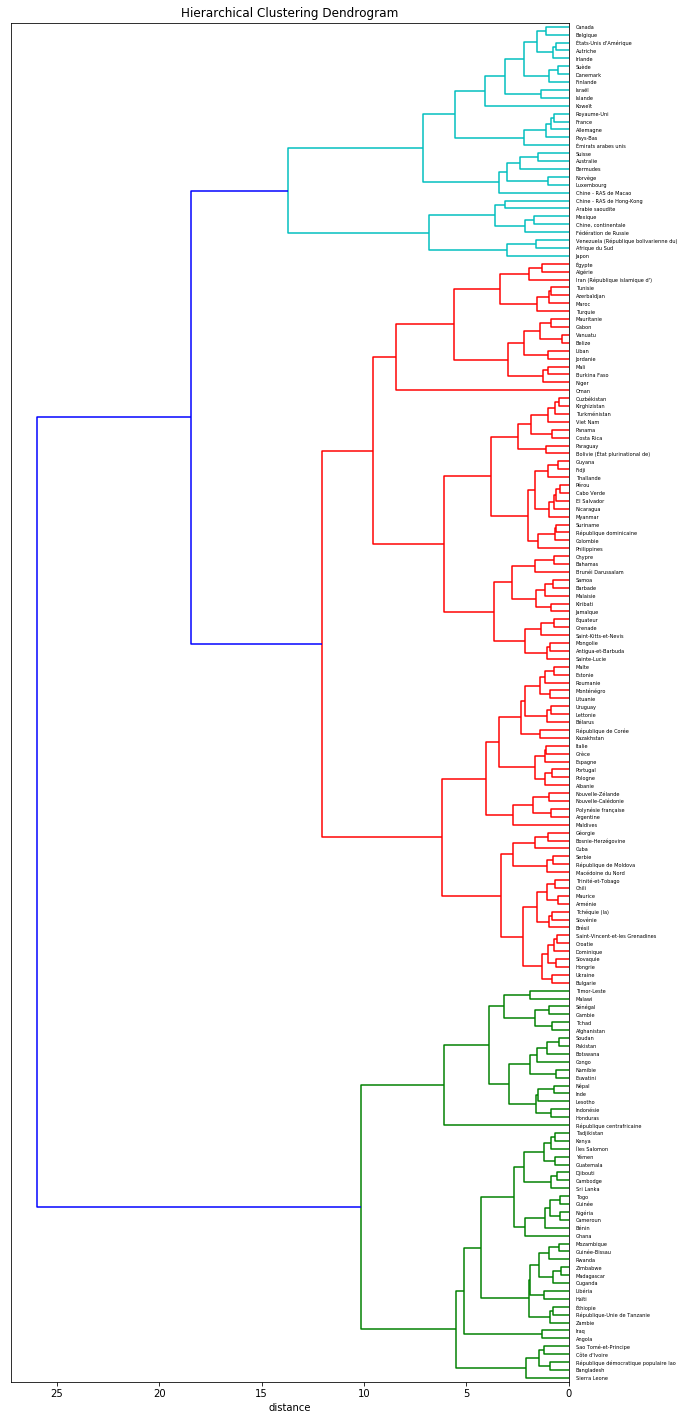

In [18]:
# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme

plot_dendrogram(Z, names)

In [19]:
#Découpage en 7 clusters : 
clusters = fcluster(Z, 7, criterion='maxclust')

## Calcul des centroïdes

In [20]:
#On passe par mean() pour calculer les centroïdes de chaque groupe (Point à vérifier tout de même) 
#Puisque la classification hiérarchique n'utilise pas de centres.

In [21]:
clusters_df = pd.DataFrame(clusters, index=echantillon.index, columns=['Clusters'])
echantillon = pd.merge(echantillon, clusters_df, left_index = True, right_index = True, how = "left")

echantillon_grouped = echantillon.groupby('Clusters').mean()
echantillon_grouped

#Le cluster 7 semble être le meilleur : 
#Ratio prot très élevé, PIB élever et en augmentation, pays importateurs de viandes de volailles et imports en augmentation 

,Ratio_pop (%),Ratio_prot (kg/personne),Dispo_prot (kg/personne),Dispo_alim_tot (kcal/personne),Importations (Tonnes),PIB par habitant (US $),Ratio_PIB (%)
Clusters,,,,,,,
1,102.427914,22.182404,20.982938,8.693502e+05,43481.281250,1572.833579,108.446614
2,101.978910,28.605668,22.441011,8.619475e+05,8623.055556,2210.074838,95.320082
3,100.171573,53.137956,34.379439,1.144195e+06,35137.000000,14845.582609,105.972082
4,101.100975,49.185027,27.684176,9.829450e+05,17001.323529,8582.833482,103.442518
5,102.742038,32.594316,31.924832,1.120829e+06,24720.176471,5752.159743,101.303010
6,100.808859,51.003767,34.448700,1.115988e+06,534693.000000,19456.386234,99.048643
7,100.904670,60.780009,39.363259,1.242261e+06,110751.636364,60472.020730,104.096403


## Interprétation des clusters 

Le Cluster 7 semble être le plus intéressant, puisque celui-ci se compose des pays ayant les plus hauts taux de :<br/>
-Ratio prot <br/>
-Dispo_prot <br/>
-Dispo_alim_tot <br/>
-PIB / habitant <br/>
Ainsi qu'une augmentation significative du PIB par rapport à n-1

## Liste des pays du Cluster 7

In [22]:
country_to_keep = echantillon[echantillon.Clusters == 7]
country_to_keep

,Ratio_pop (%),Ratio_prot (kg/personne),Dispo_prot (kg/personne),Dispo_alim_tot (kcal/personne),Importations (Tonnes),PIB par habitant (US $),Ratio_PIB (%),Clusters
Pays,,,,,,,,
Allemagne,99.911836,60.647007,37.00735,1278595.0,343958.0,46176.177749,105.624874,7
Australie,101.271150,67.466591,38.78490,1196470.0,6211.0,66301.306788,95.668974,7
Autriche,100.366257,59.190207,38.76300,1376050.0,40627.0,50137.519579,104.304448,7
Belgique,100.397830,58.508604,36.27005,1364005.0,151787.0,46713.462219,103.990267,7
Bermudes,100.000000,66.710934,32.98140,973820.0,2070.0,90329.786048,102.175947,7
Canada,100.987428,52.065486,38.34690,1277135.0,164218.0,52264.959967,99.988773,7
Chine - RAS de Macao,101.615799,64.485488,34.58375,1063975.0,12500.0,89525.344880,117.031619,7
Danemark,100.375134,64.199007,39.69010,1228590.0,58330.0,60942.805627,104.517962,7
Finlande,100.332840,62.121470,42.90940,1228590.0,2584.0,49659.588178,104.713513,7


# ACP

## Composantes principales

In [23]:
from functions import *

In [24]:
#Choix du nombre de composantes à calculer : 
n_comp = 6

# Selection des colonnes à prendre en compte dans l'ACP : 
data_pca = echantillon[["Ratio_pop (%)", "Ratio_prot (kg/personne)", 
                        "Dispo_prot (kg/personne)", "Dispo_alim_tot (kcal/personne)", 
                        "Importations (Tonnes)", "PIB par habitant (US $)", 
                        "Ratio_PIB (%)"]]

#Import des clusters : 
clusters = [echantillon.loc[pays, "Clusters"] for pays in echantillon.index]

#Préparation des données pour l'ACP :
data_pca = data_pca.fillna(data_pca.mean()) #On remplace les valeurs inconnues par la moyenne de la variable

X = data_pca.values #On ne prend que les valeurs

names = data_pca.index

features = data_pca.columns

#Centrage et réduction : 
std_scale = preprocessing.StandardScaler().fit(X) #On centre
X_scaled = std_scale.transform(X) #On réduit

#Calcul des composantes principales 
pca = decomposition.PCA(n_components = n_comp)
pca = pca.fit(X_scaled)

## Eboulis des valeurs propres 

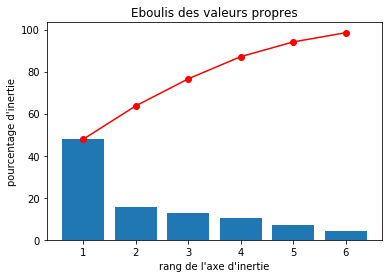

In [25]:
display_scree_plot(pca)

L'éboulis des valeurs propres nous apprend que la composante principale 1 (PC1), explique 47,9% des informations. <br/>
La composante principale 2 (PC2) explique 15,8% des informations. <br/>
Il nous faut ici 6 composantes principales pour atteindre un nombre proche des 100% <br/><br/>
Nous nous concentrerons dans cette interprétation uniquement à PC1.

Notons aussi qu'un plan factoriel (F) correspond à la projection d'une composante principale (PC) sur un axe. <br/>
F1 correspond donc à la projection de PC1, F2 à la projection de PC2, ect...

## Cercle des corrélations

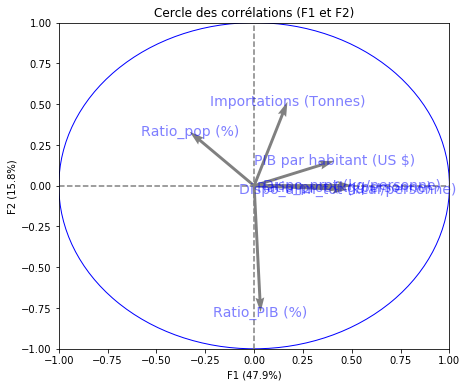

In [26]:
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))
plt.show()

Le cercle des corrélation n'est pas très lisible dans la partie droite <br/>
Ajoutons un zoom : 

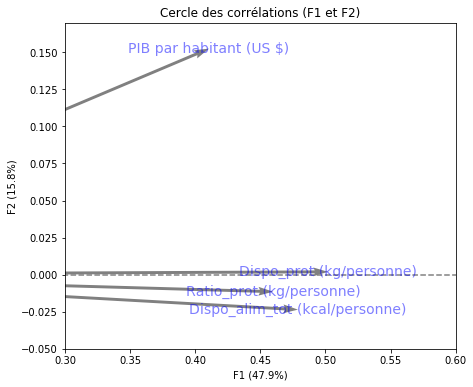

In [27]:
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features), 
                lims=[0.3, 0.6, -0.05, 0.17])

### Poids des variables :

In [28]:
poids_des_variables = pd.DataFrame(pcs, index=[["F1", "F2", "F3", "F4", "F5", "F6"]], 
                                   columns = features)
poids_des_variables.loc[["F1", "F2"]]

,Ratio_pop (%),Ratio_prot (kg/personne),Dispo_prot (kg/personne),Dispo_alim_tot (kcal/personne),Importations (Tonnes),PIB par habitant (US $),Ratio_PIB (%)
F1,-0.329642,0.459767,0.501907,0.478853,0.170582,0.410533,0.033221
F2,0.330763,-0.011468,0.001920,-0.023593,0.514805,0.152462,-0.775652


### Interprétation de PC1

On peut voir sur PC1 que les variables ayant le plus de poids dans l'inertie sont : <br/>
<li><ol>La disponibilité en protéines</ol> 
    <ol>La disponinibilité alimentaire totale</ol> 
    <ol>Le ratio de protéines animales / Protéines totales</ol> 
    <ol>Le PIB par Habitant</ol>
    <ol>Le ratio de population (en négatif)</ol></li>

On peut donc conclure que la composante principale PC1 correspond au niveau de richesses du pays

## Projection des individus 

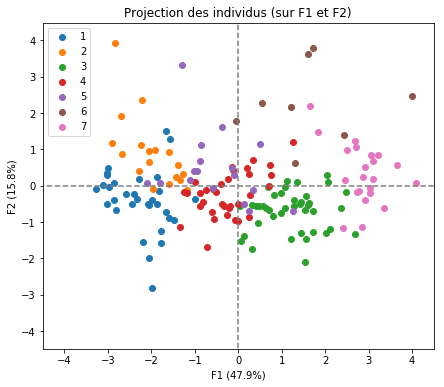

In [29]:
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = clusters)

<p> A l'exception du cluster 6, les pays sont regroupés correctement par cluster sur F1. <br/>
Si certains semblent être confondus avec les autres, c'est F2 qui nous permet de voir la différence entre ces derniers. </p>

<p> Dans la partie du dendogramme, nous avons vu que le cluster 7 était celui qui nous intéressait le plus, voyons donc comment sont répartis les pays de ce cluster, et à quoi est-ce qu'ils correspondent, après l'ACP.</p>

<p> Le cluster 7 représente les pays le plus à droite sur F1, avec donc une forte valeur. <br/>
    Comme nous l'avons vu précédement, F1 représente le niveau de richesse du pays ; <br/>
    Les pays du cluster 7 correspondent donc aux pays les plus riches.</p>

### Cluster 6, en détails : 

In [30]:
cluster_6 = echantillon[echantillon.Clusters == 6]
cluster_6

#Qu'est-ce qui différentie le cluster 6 du 7 ; 
#Pourquoi ne pas prendre les deux pays sortant du lot dans le cluster 6, et quels sont-ils ?

,Ratio_pop (%),Ratio_prot (kg/personne),Dispo_prot (kg/personne),Dispo_alim_tot (kcal/personne),Importations (Tonnes),PIB par habitant (US $),Ratio_PIB (%),Clusters
Pays,,,,,,,,
Afrique du Sud,100.744474,42.646197,31.14545,1102300.0,319687.0,6818.736993,91.181948,6
Arabie saoudite,101.912472,43.585544,33.43035,1188075.0,830559.0,24934.386142,98.542832,6
Chine - RAS de Hong-Kong,100.783436,73.138607,47.11055,1199390.0,723484.0,38566.712121,104.356553,6
"Chine, continentale",100.617400,40.050994,35.78825,1135880.0,540156.0,6967.799286,111.805352,6
Fédération de Russie,99.765314,54.644490,37.52565,1226400.0,502920.0,15533.899955,102.660542,6
Japon,99.916699,55.276669,31.99225,994990.0,414326.0,40180.809978,83.187149,6
Mexique,101.228827,46.426125,31.96670,1119820.0,667549.0,10400.569944,104.628237,6
Venezuela (République bolivarienne du),101.502253,52.261513,26.63040,961045.0,278863.0,12248.175454,96.026525,6


On peut voir sur le Dendrogramme que le cluster 6 et 7 sont très proches, ils ne se différencient qu'au dernier embranchement. <br/>
Lorsque l'on regarde la moyenne des variables, on peut aussi voir que les parties Dispo_prot, dispo_alim_tot et ratio_prot sont très proches.

Alors, qu'est-ce qui différencie ces deux clusters ? <br/>
On remarque que les importations sont nettements plus importantes dans le cluster 6 que dans le 7, à l'inverse le PIB est nettement inférieur dans le 6 que dans le 7. <br/>
Ce sont donc ces deux points qui séparent les clusters.

Comme nous avons pu le voir dans la projection des individus sur le plan factoriel, deux pays du cluster 6 semblent sortir du lot, et avoir une valeur élevée sur F1. <br/>
Il va donc falloir voir ces deux pays en détails pour voir s'ils sont intéressants, et si nous les ajoutons dans la liste de nos pays. (Ne pas oublier que le Mexique est dans le cluster 6, et vendre du poulet au Mexique n'est surement pas une mauvaise idée !)

In [31]:
"""factorial = pd.DataFrame(X_projected, index=names, columns=[["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"]])
factorial = factorial["PC1"]
factorial = pd.merge(echantillon, factorial, left_index = True, right_index = True, how = "left")

factorial"""

'factorial = pd.DataFrame(X_projected, index=names, columns=[["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"]])\nfactorial = factorial["PC1"]\nfactorial = pd.merge(echantillon, factorial, left_index = True, right_index = True, how = "left")\n\nfactorial'

# Test D'adéquation 

In [32]:
from scipy.stats import ks_2samp

H0 : La variable suit une loi normale <br/> H1 : La variable ne suit pas une loi normale

On rejettera H0 si p_valeur < Alpha

In [33]:
alpha = 0.05

## Ratio pop :

In [34]:
np.random.seed(1)
stats, pvalue = ks_2samp(echantillon["Ratio_pop (%)"],list(np.random.normal(np.mean(echantillon["Ratio_pop (%)"]), np.std(echantillon["Ratio_pop (%)"]), 1000)))

if pvalue < alpha :
    print("La variable ne suit pas une loi normale")
else : 
    print("La variable suit une loi normale")

La variable suit une loi normale


## Ratio prot :

In [35]:
np.random.seed(1)
stats, pvalue = ks_2samp(echantillon["Ratio_prot (kg/personne)"],list(np.random.normal(np.mean(echantillon["Ratio_prot (kg/personne)"]), np.std(echantillon["Ratio_prot (kg/personne)"]), 1000)))

if pvalue < alpha :
    print("La variable ne suit pas une loi normale")
else : 
    print("La variable suit une loi normale")

La variable suit une loi normale


## Dispo_prot : 

In [36]:
np.random.seed(1)
stats, pvalue = ks_2samp(echantillon["Dispo_prot (kg/personne)"],list(np.random.normal(np.mean(echantillon["Dispo_prot (kg/personne)"]), np.std(echantillon["Dispo_prot (kg/personne)"]), 1000)))

if pvalue < alpha :
    print("La variable ne suit pas une loi normale")
else : 
    print("La variable suit une loi normale")

La variable suit une loi normale


## Dispo_alim_tot : 

In [37]:
np.random.seed(1)
stats, pvalue = ks_2samp(echantillon["Dispo_alim_tot (kcal/personne)"],list(np.random.normal(np.mean(echantillon["Dispo_alim_tot (kcal/personne)"]), np.std(echantillon["Dispo_alim_tot (kcal/personne)"]), 1000)))

if pvalue < alpha :
    print("La variable ne suit pas une loi normale")
else : 
    print("La variable suit une loi normale")

La variable suit une loi normale


## PIB par habitant : 

In [38]:
np.random.seed(1)
stats, pvalue = ks_2samp(echantillon["PIB par habitant (US $)"],list(np.random.normal(np.mean(echantillon["PIB par habitant (US $)"]), np.std(echantillon["PIB par habitant (US $)"]), 1000)))

if pvalue < alpha :
    print("La variable ne suit pas une loi normale")
else : 
    print("La variable suit une loi normale")

La variable ne suit pas une loi normale


## Ratio_PIB : 

In [39]:
np.random.seed(1)
stats, pvalue = ks_2samp(echantillon["Ratio_PIB (%)"],list(np.random.normal(np.mean(echantillon["Ratio_PIB (%)"]), np.std(echantillon["Ratio_PIB (%)"]), 1000)))

if pvalue < alpha :
    print("La variable ne suit pas une loi normale")
else : 
    print("La variable suit une loi normale")

La variable suit une loi normale


## Import_poulet

In [40]:
np.random.seed(1)
stats, pvalue = ks_2samp(echantillon["Importations (Tonnes)"],list(np.random.normal(np.mean(echantillon["Importations (Tonnes)"]), np.std(echantillon["Importations (Tonnes)"]), 1000)))

if pvalue < alpha :
    print("La variable ne suit pas une loi normale")
else : 
    print("La variable suit une loi normale")

La variable ne suit pas une loi normale


# Test de comparaison

In [41]:
import scipy

H0 : Les deux échantillon sont identiques (moyennes et variances) <br/> H1 : Les deux échantillons diffèrent

In [42]:
alpha = 0.01

On rejette H0 si p_valeur < alpha

## Préparation des datasets :

In [43]:
X = country_to_keep[country_to_keep.Clusters == 5]["Ratio_prot (kg/personne)"]
Y = country_to_keep[country_to_keep.Clusters == 7]["Ratio_prot (kg/personne)"]

## Egalité des Variances : 

In [44]:
stats, pvaleur = scipy.stats.bartlett(X,Y)
if pvaleur > alpha:
    print("Les variances sont les mêmes, les variables suivent donc la même loi.")
else:
    print("Les variances ne sont pas les mêmes, les variables ne suivent pas la même loi.")

Les variances ne sont pas les mêmes, les variables ne suivent pas la même loi.


Les variances sont bien les mêmes sur les deux clusters <br/>
Les clusters suivent donc la même loi normale

## Egalité de Moyennes : 

In [45]:
stats, pvaleur = scipy.stats.ttest_ind(X,Y, equal_var=True)

if pvaleur > alpha:
    print("Les moyennes sont les mêmes, les variables ne diffèrent pas.")
else:
    print("Les moyennes ne sont pas les mêmes, les variables diffèrent.")

Les moyennes ne sont pas les mêmes, les variables diffèrent.


Les moyennes diffèrent <br/>
Les clusters suivent la même loi normale mais diffèrent bien entre eux.